In [ ]:
!pip install torch torchvision timm pandas scikit-learn matplotlib tqdm pillow

from google.colab import drive
drive.mount('/content/drive')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import os

WORKDIR = '/content/data'
os.makedirs(WORKDIR, exist_ok=True)

TRAIN_ZIP = '/content/drive/MyDrive/MultiZooProject/train.zip'
if os.path.exists(TRAIN_ZIP):

    !unzip -oq "{TRAIN_ZIP}" -d "{WORKDIR}"
else:
    raise FileNotFoundError(f"{TRAIN_ZIP} bulunamadı. Lütfen Drive’da doğru konuma koyun.")



In [ ]:

import os

TRAIN_DIR = os.path.join(WORKDIR, 'train')
TEST_DIR  = os.path.join(WORKDIR, 'test')

print("Train klasörleri:", os.listdir(TRAIN_DIR))
if os.path.isdir(TEST_DIR):
    print("Test klasörleri:", os.listdir(TEST_DIR))
else:
    print("Test dizini yok.")


Train klasörleri: ['zebra', 'gorilla', 'hippopotamus', 'hummingbird', 'hamster', 'pig', 'hedgehog', 'lizard', 'whale', 'rat', 'deer', 'okapi', 'rhinoceros', 'porcupine', 'beetle', 'woodpecker', 'cow', 'moth', 'fox', 'lion', 'bee', 'sandpiper', 'fly', 'elephant', 'dragonfly', 'chimpanzee', 'crow', 'goldfish', 'squirrel', 'butterfly', 'boar', 'raccoon', 'bear', 'cat', 'seal', 'swan', 'grasshopper', 'seahorse', 'lobster', 'parrot', 'otter', 'turtle', 'badger', 'mouse', 'coyote', 'kangaroo', 'hare', 'wolf', 'ox', 'goat', 'dolphin', 'owl', 'bat', 'jellyfish', 'hornbill', 'eagle', 'possum', 'shark', 'pigeon', 'caterpillar', 'bison', 'antelope', 'hyena', 'reindeer', 'dog', 'snake', 'wombat', 'panda', 'ladybugs', 'mosquito', 'goose', 'orangutan', 'flamingo', 'oyster', 'koala', 'penguin', 'squid', 'octopus', 'sheep', 'duck', 'starfish', 'turkey', 'sparrow', 'crab', 'pelecaniformes', 'leopard', 'horse', 'donkey', 'tiger', 'cockroach']
Test dizini yok.


In [ ]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

full_ds = datasets.ImageFolder(TRAIN_DIR, transform=train_transform)
val_size = int(0.2 * len(full_ds))
train_size = len(full_ds) - val_size
train_ds, val_ds = random_split(full_ds, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=2)

classes     = full_ds.classes
num_classes = len(classes)
print(f"Sınıf sayısı: {num_classes}, sınıflar: {classes}")

if os.path.isdir(TEST_DIR):
    test_ds = datasets.ImageFolder(TEST_DIR, transform=val_transform)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)
else:
    test_loader = None


Sınıf sayısı: 90, sınıflar: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
<ipython-input-7-ff167080472c>:26: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler() if use_amp else None


Yeni eğitim başlıyor.


Epoch 1 -> Train:   0%|          | 0/120 [00:00<?, ?it/s]<ipython-input-7-ff167080472c>:58: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1 -> Train: 100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
<ipython-input-7-ff167080472c>:85: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 01 -> Train loss: 3.2102, acc: 0.2851 | Val loss: 1.8619, acc: 0.5891


Epoch 2 -> Train: 100%|██████████| 120/120 [00:45<00:00,  2.64it/s]


Epoch 02 -> Train loss: 1.2724, acc: 0.7180 | Val loss: 1.2148, acc: 0.7222


Epoch 3 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.96it/s]


Epoch 03 -> Train loss: 0.7872, acc: 0.8257 | Val loss: 0.9402, acc: 0.7736


Epoch 4 -> Train: 100%|██████████| 120/120 [00:42<00:00,  2.83it/s]


Epoch 04 -> Train loss: 0.6019, acc: 0.8611 | Val loss: 0.8334, acc: 0.7883


Epoch 5 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.93it/s]


Epoch 05 -> Train loss: 0.4841, acc: 0.8894 | Val loss: 0.8523, acc: 0.7904


Epoch 6 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.03it/s]


Epoch 06 -> Train loss: 0.4418, acc: 0.8975 | Val loss: 0.7675, acc: 0.7998


Epoch 7 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.93it/s]


Epoch 07 -> Train loss: 0.4080, acc: 0.9054 | Val loss: 0.7460, acc: 0.7966


Epoch 8 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.01it/s]


Epoch 08 -> Train loss: 0.3308, acc: 0.9198 | Val loss: 0.7605, acc: 0.7998


Epoch 9 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.98it/s]


Epoch 09 -> Train loss: 0.3480, acc: 0.9159 | Val loss: 0.8063, acc: 0.7809


Epoch 10 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.96it/s]


Epoch 10 -> Train loss: 0.3311, acc: 0.9164 | Val loss: 0.7154, acc: 0.8103


Epoch 11 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.94it/s]


Epoch 11 -> Train loss: 0.3012, acc: 0.9271 | Val loss: 0.7801, acc: 0.7945


Epoch 12 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.02it/s]


Epoch 12 -> Train loss: 0.3149, acc: 0.9206 | Val loss: 0.7114, acc: 0.8134


Epoch 13 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.02it/s]


Epoch 13 -> Train loss: 0.2798, acc: 0.9329 | Val loss: 0.7313, acc: 0.8050


Epoch 14 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.99it/s]


Epoch 14 -> Train loss: 0.2395, acc: 0.9371 | Val loss: 0.7007, acc: 0.8208


Epoch 15 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.01it/s]


Epoch 15 -> Train loss: 0.2614, acc: 0.9345 | Val loss: 0.7539, acc: 0.7977


Epoch 16 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.98it/s]


Epoch 16 -> Train loss: 0.2546, acc: 0.9340 | Val loss: 0.7583, acc: 0.7987


Epoch 17 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.02it/s]


Epoch 17 -> Train loss: 0.2501, acc: 0.9368 | Val loss: 0.7739, acc: 0.7977


Epoch 18 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.97it/s]


Epoch 18 -> Train loss: 0.2510, acc: 0.9363 | Val loss: 0.7458, acc: 0.8050


Epoch 19 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.93it/s]


Epoch 19 -> Train loss: 0.2151, acc: 0.9481 | Val loss: 0.7753, acc: 0.7956


Epoch 20 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.04it/s]


Epoch 20 -> Train loss: 0.2257, acc: 0.9468 | Val loss: 0.7249, acc: 0.8155


Epoch 21 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.95it/s]


Epoch 21 -> Train loss: 0.2176, acc: 0.9444 | Val loss: 0.7788, acc: 0.7914


Epoch 22 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.06it/s]


Epoch 22 -> Train loss: 0.2254, acc: 0.9400 | Val loss: 0.7863, acc: 0.7977


Epoch 23 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.98it/s]


Epoch 23 -> Train loss: 0.2055, acc: 0.9468 | Val loss: 0.7864, acc: 0.7935


Epoch 24 -> Train: 100%|██████████| 120/120 [00:39<00:00,  3.07it/s]


Epoch 24 -> Train loss: 0.2360, acc: 0.9400 | Val loss: 0.8043, acc: 0.7977


Epoch 25 -> Train: 100%|██████████| 120/120 [00:40<00:00,  2.99it/s]


Epoch 25 -> Train loss: 0.2035, acc: 0.9450 | Val loss: 0.8301, acc: 0.7925


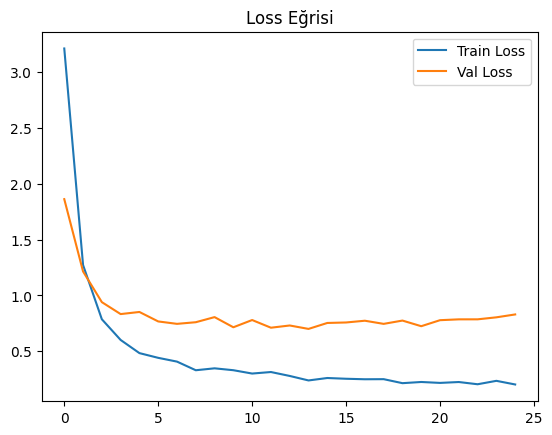

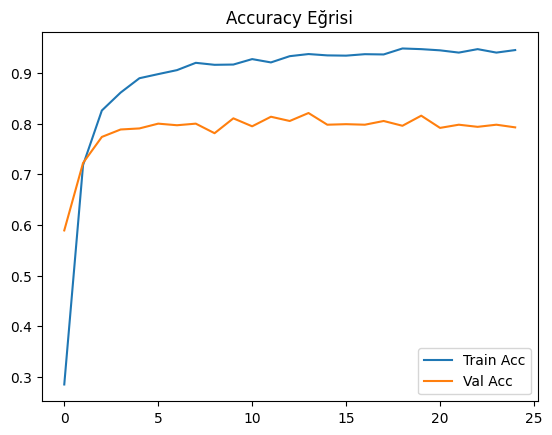

In [ ]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.cuda.amp import autocast, GradScaler
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

WORKDIR = '/content/drive/MyDrive/vit_model'
os.makedirs(WORKDIR, exist_ok=True)

CKPT_PATH = os.path.join(WORKDIR, 'checkpoint.pt')
epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
use_amp = torch.cuda.is_available()

model = timm.create_model('vit_tiny_patch16_224', pretrained=True, num_classes=num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scaler = GradScaler() if use_amp else None

if os.path.exists(CKPT_PATH):
    ckpt = torch.load(CKPT_PATH, map_location=device)
    start_epoch    = ckpt['epoch'] + 1
    best_val_acc   = ckpt['best_val_acc']
    model.load_state_dict(ckpt['model_state'])
    optimizer.load_state_dict(ckpt['optim_state'])
    train_losses   = ckpt['train_losses']
    val_losses     = ckpt['val_losses']
    train_accs     = ckpt['train_accs']
    val_accs       = ckpt['val_accs']
    print(f"Checkpoint yüklendi. {start_epoch-1}. epoch tamamlanmış; devam ediliyor.")
else:
    start_epoch    = 1
    best_val_acc   = 0
    train_losses   = []
    val_losses     = []
    train_accs     = []
    val_accs       = []
    print("Yeni eğitim başlıyor.")


for epoch in range(start_epoch, epochs + 1):
    model.train()
    running_loss, correct = 0.0, 0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch} -> Train"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()

        if use_amp:
            with autocast():
                preds = model(imgs)
                loss = criterion(preds, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            preds = model(imgs)
            loss = criterion(preds, labels)
            loss.backward()
            optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        correct += (preds.argmax(1) == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    model.eval()
    val_running, val_correct = 0.0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            if use_amp:
                with autocast():
                    preds = model(imgs)
                    loss = criterion(preds, labels)
            else:
                preds = model(imgs)
                loss = criterion(preds, labels)

            val_running += loss.item() * imgs.size(0)
            val_correct += (preds.argmax(1) == labels).sum().item()

    val_loss = val_running / len(val_loader.dataset)
    val_acc = val_correct / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch {epoch:02d} -> Train loss: {epoch_loss:.4f}, acc: {epoch_acc:.4f} | "
          f"Val loss: {val_loss:.4f}, acc: {val_acc:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), os.path.join(WORKDIR, 'best_model.pt'))

    checkpoint = {
        'epoch': epoch,
        'model_state': model.state_dict(),
        'optim_state': optimizer.state_dict(),
        'best_val_acc': best_val_acc,
        'train_losses': train_losses,
        'train_accs': train_accs,
        'val_losses': val_losses,
        'val_accs': val_accs,
    }
    torch.save(checkpoint, CKPT_PATH)


plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.legend()
plt.title('Loss Eğrisi')
plt.savefig(os.path.join(WORKDIR, 'loss_curve.png'))

plt.figure()
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.legend()
plt.title('Accuracy Eğrisi')
plt.savefig(os.path.join(WORKDIR, 'acc_curve.png'))
